In [2]:
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt

In [3]:
#unocculted flux (using the Sun's in W/m^2)
f_0 = 1335

#star radius (Sun, kg)
R_s = 6.9*10**8

#ratio of planet radius to star radius (Carter uses 0.2)
r=0.2

#semi-major axis (Earth's for now)
a = 1.5 * 10**8

#eccentricity (using Earth's)
e = 0.01

#inclination (radians)
i = np.pi

#argument of the pericenter
ω = np.pi/8

#angular freq (what's a typical value for this?)
n = 7.5

In [4]:
#normalized impact parameter
b = (a * np.cos(i) / R_s) * ((1 - e**2)/(1 + e * np.sin(ω)))
b=0.5

τ_0 = (R_s / (a * n)) * (np.sqrt(1 - e**2) / (1 + e * np.sin(ω)))

In [5]:
#parameters

δ = f_0 * r**2

T = 2 * τ_0 * np.sqrt(1 - b**2)

τ = 2 * τ_0 * r / np.sqrt(1 - b**2)

In [11]:
(T/2)-τ/2


0.3880146374446116

In [16]:
#Piecewise linear

#based on the value of T given the values above, this seems like a good range for t
t = np.linspace(0,5,500)

#for symmetry purposes setting as 1.5
t_c = 2.5
def lin_lc(x):
    if np.abs(x-t_c) <= (T/2 - τ/2):
        return f_0 - δ
    elif (T/2 - τ/2) < np.abs(x-t_c) < (T/2 + τ/2):
        return f_0 - δ + δ/τ * (np.abs(x-t_c) - T/2 + τ/2)
    elif np.abs(x-t_c) >= (T/2 + τ/2):
        return f_0
    else: return 0

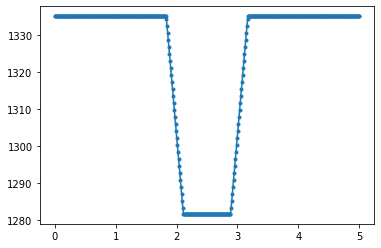

In [17]:
plt.plot(t, list(map(lin_lc, t)),marker='.');